### OFICINA AULA 24 - CAPACITA BRASIL

Esse modelo que irá prever se o tumor de um câncer de mama é maligno ou benigno com base nos dados de exames do paciente

This model predicts if a breast cancer tumor is benign or malignant based on the patient's exam data

## **IMPORTANDO BIBLIOTECAS E DATASET**

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer




## **PREPARANDO E PRÉ-PROCESSANDO OS DADOS**

O pré-processamento dos dados é crucial para garantir que o modelo funcione bem. Isso inclui limpeza, normalização e divisão dos dados em conjuntos de treino e teste. A divisão é importante para avaliar se o modelo generaliza bem para dados novos.

In [3]:
#Carregando o dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Informações do dataset
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
#Adicionando a coluna que vai ter o rotulo do diagnóstico (0 = maligno, 1 = benigno)
df['diagnosis'] = data.target


#Mapeando a coluna
df['diagnosis'] = df['diagnosis'].map({0: 'Maligno', 1: 'Benigno'})

df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

#VISUALIZANDO DADOS

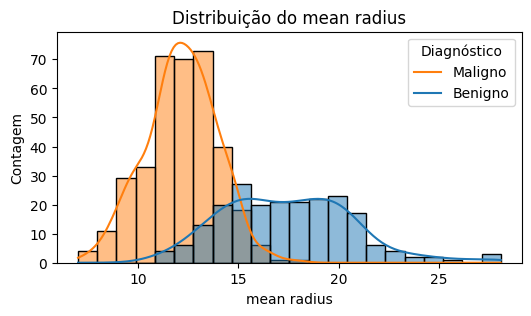

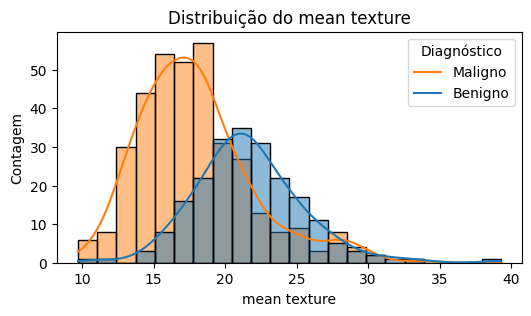

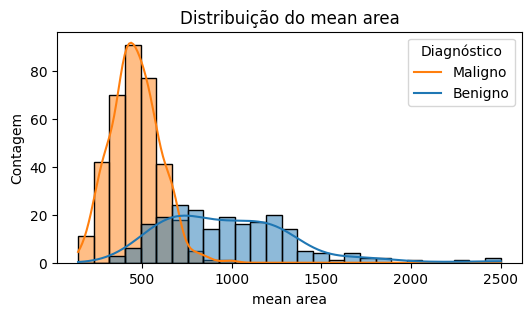

In [6]:
#Selecionando colunas que vão pro gráfico
features_to_plot = ['mean radius', 'mean texture', 'mean area']

#Gerando gráficos pra cada feature
for feature in features_to_plot:
    plt.figure(figsize=(6, 3))

    #distribuições das características por diagnóstico
    sns.histplot(df, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribuição do {feature}')
    plt.xlabel(feature)
    plt.ylabel('Contagem')

    plt.legend(title='Diagnóstico', labels=['Maligno', 'Benigno'])
    plt.show()

#DIVIDINDO OS DADOS DE TREINO E TESTE E TREINANDO O MODELO

No modelo do Random Forest, parâmetros como n_estimators (número de árvores) e max_depth (profundidade das árvores) controlam a complexidade. Mais árvores podem melhorar a precisão, mas aumentar demais a profundidade pode levar a overfitting.

In [7]:
#Separando a variável target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

#Dividindo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#USANDO RANDOM FOREST
clf = RandomForestClassifier(n_estimators=100, #num de árvores
                             max_depth=10, #Limitador de profundidade pra evitar overfitting
                             min_samples_split=5, #cada nó com 5 amostras
                             min_samples_leaf=2, # cada folha dcom duas amostras
                             random_state=42)
#treinando
clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

#AVALIANDO O MODELO E MOSTRANDO OS RESULTADOS DO TREINAMENTO

O modelo é treinado com os dados de treino e avaliado com os de teste. As métricas como F1-score, precisão, recall e acurácia ajudam a entender o desempenho, especialmente em problemas desbalanceados.


AVALIANDO:
               precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        71
     Maligno       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Acurácia do modelo: 0.96


<Axes: >

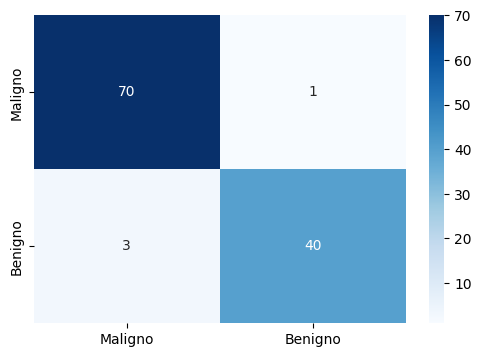

In [9]:
y_pred = clf.predict(X_test)

print("\nAVALIANDO:\n", classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

#Gráfico da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])


#AJUSTANDO HIPERPARAMETROS

Ajustar hiperparâmetros, como o número de árvores e a profundidade, pode melhorar a performance. Ferramentas como Grid Search ou Random Search ajudam a encontrar a melhor combinação.

In [11]:
#Definindo hiperparâmetros
param_grid = {
    'n_estimators': [300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

#Classificador
#grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
#grid_search.fit(X_train, y_train)

#Melhor modelo encontrado
#best_model = grid_search.best_estimator_
#y_pred_best = best_model.predict(X_test)

Usando RandomSearch pra poder rodar em um tempo ok

In [12]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid,
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Melhores Hiperparâmetros:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores Hiperparâmetros: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


É essencial evitar overfitting, garantindo que o modelo generalize bem para novos dados. Um bom equilíbrio entre complexidade e generalização é chave para um modelo eficiente e confiável. Além disso, validar o modelo com diferentes conjuntos de dados e métricas ajuda a garantir que ele funcione bem em situações reais, não apenas nos dados de treinamento. A escolha cuidadosa de hiperparâmetros e a avaliação contínua são práticas importantes para manter a qualidade do modelo.